In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

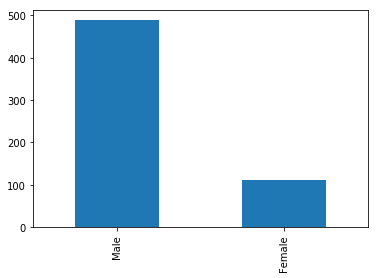

In [6]:
data.Gender.value_counts().plot(kind='bar')

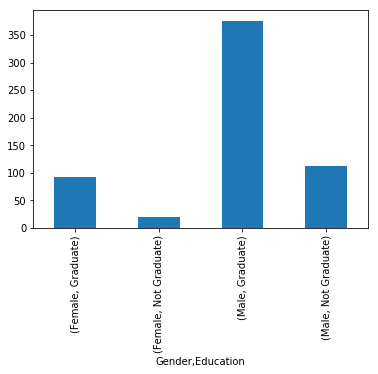

In [8]:
data.groupby(["Gender", "Education"])["Loan_ID"].count().plot(kind="bar");

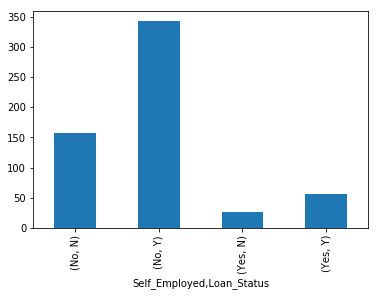

In [9]:
data.groupby(["Self_Employed", "Loan_Status"])["Loan_ID"].count().plot(kind='bar')

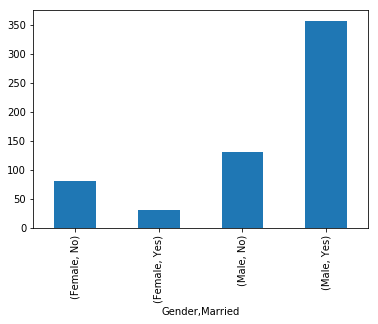

In [10]:
data.groupby(["Gender", "Married"])["Loan_ID"].count().plot(kind="bar");

In [11]:
data.LoanAmount

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
6       95.0
7      158.0
8      168.0
9      349.0
10      70.0
11     109.0
12     200.0
13     114.0
14      17.0
15     125.0
16     100.0
17      76.0
18     133.0
19     115.0
20     104.0
21     315.0
22     116.0
23     112.0
24     151.0
25     191.0
26     122.0
27     110.0
28      35.0
29     120.0
       ...  
584    146.0
585    172.0
586    104.0
587     70.0
588     94.0
589    106.0
590     56.0
591    205.0
592    292.0
593    142.0
594    260.0
595    110.0
596    187.0
597     88.0
598    180.0
599    192.0
600    350.0
601    155.0
602    128.0
603    172.0
604    496.0
605      NaN
606    173.0
607    157.0
608    108.0
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [14]:
mode_gen = data.Gender.value_counts().idxmax()
# so we can see Male is the most common value so lets replace with it
data.Gender.fillna(mode_gen , inplace=True)

In [15]:
# Lets do same for the married column
data[ "Married"].fillna(data.Married.value_counts().idxmax(), inplace=True) # here all missing values are replace with "YES" as
# It is the most frequent value

In [16]:
# Lets do it for dependent column.
data.Dependents.value_counts().idxmax()
# We can see mostly people has no dependent. So we wil use that value

'0'

In [18]:
data.Dependents.fillna(data.Dependents.value_counts().idxmax(), inplace=True)

In [19]:
data.Self_Employed.value_counts().idxmax()

'No'

In [30]:
data.Self_Employed.fillna(data.Self_Employed.value_counts().idxmax(), inplace=True)

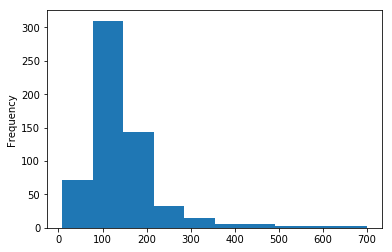

In [20]:
# now lets see for loan amount
data.LoanAmount.plot("hist") # so we can see loan amount is float value. Let plot it first

In [22]:
data.LoanAmount.mean()

146.41216216216216

In [24]:
# So from our histograme we can see mostly loan amount lies between 100-150 and our mean value is 146. Which means 
# we can replace our missing values with mean in this case.
data.LoanAmount.fillna(data.LoanAmount.mean(), inplace=True)
data.Loan_Amount_Term.value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [25]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.value_counts().idxmax(), inplace=True)

In [26]:
data.Credit_History.value_counts() 
# again we can see in case of credit history also we can only have two values
# and mostl we have 1 value. So lets do i.

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
data.Credit_History.fillna(data.Credit_History.value_counts().idxmax(), inplace=True)

In [31]:
data.isnull().sum() 
# so now finally we have replaced all the missing values.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see there are few categrical featues ike Gender, Married, Education, Self_Employed, Property_Area, Load_Status
As machine learning algorithm only understands numerical values. So we have to change them into numeric values.
to do that we add dummy variables for each categorical value

In [33]:
# before everythning lets delete Loan_ID column as we do not need it.
data.drop(["Loan_ID"],axis=1, inplace=True)

In [34]:
dummy_gen = pd.get_dummies(data.Gender) 
# So we can see get_dummies() change our categorical values into dummy variable

In [35]:
dummy_gen.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [36]:
# lets add these values to our main df
data = pd.concat([dummy_gen, data],  axis=1)

In [37]:
data.drop(["Female", "Gender"], axis=1, inplace=True)

In [38]:
# We will get same column name so it will be a problem & confusing.
data.Married.replace("No", "Unmarried", inplace=True)
data.Married.replace("Yes", "Married", inplace=True)
data.Self_Employed.replace("No", "Job", inplace=True)
data.Self_Employed.replace("Yes", "Business", inplace=True)

In [39]:
# Lets do same for other columns. Dummy variable idea is like if u have n dummy variable take only n-1. In or case
# 2 columns were there Male, Female. We took only one.
# Lets apply for Married.
dummy_mar = pd.get_dummies(data.Married)
data.drop(["Married"], axis=1, inplace=True) # delete the original married column
data = pd.concat([dummy_mar, data], axis=1)
data.drop(["Unmarried"], axis=1, inplace=True)

In [40]:
# For Sel_Employed Column
dummy_emp = pd.get_dummies(data.Self_Employed)
data = pd.concat([dummy_emp, data], axis=1)
data.drop(["Business", "Self_Employed"], axis=1, inplace=True)

In [41]:
# For `education Column
dummy_edu = pd.get_dummies(data.Education)
data = pd.concat([dummy_edu, data], axis=1)
data.drop(["Not Graduate", "Education"], axis=1, inplace=True)

In [42]:
# For `Property_Area Column
dummy_prop = pd.get_dummies(data.Property_Area)
data = pd.concat([dummy_prop, data], axis=1)
data.drop(["Rural", "Property_Area"], axis=1, inplace=True)

In [43]:
# one more problem i just found in dependent column
data.Dependents.value_counts() 
# you can see there is 3+ vlaue which is string. So lets change it with 3

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [45]:
data.Dependents.replace("3+", 3, inplace=True) 
data.Dependents =data.Dependents.astype("int")  
# change the column type to integer

In [46]:
data.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [47]:
data.head()

,Semiurban,Urban,Graduate,Job,Married,Male,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,1,0,1,0,5849,0.0,146.412162,360.0,1.0,Y
1,0,0,1,1,1,1,1,4583,1508.0,128.000000,360.0,1.0,N
2,0,1,1,0,1,1,0,3000,0.0,66.000000,360.0,1.0,Y
3,0,1,0,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,Y
4,0,1,1,1,0,1,0,6000,0.0,141.000000,360.0,1.0,Y


In [49]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [50]:
X

array([[  0.        ,   1.        ,   1.        , ..., 146.41216216,
        360.        ,   1.        ],
       [  0.        ,   0.        ,   1.        , ..., 128.        ,
        360.        ,   1.        ],
       [  0.        ,   1.        ,   1.        , ...,  66.        ,
        360.        ,   1.        ],
       ...,
       [  0.        ,   1.        ,   1.        , ..., 253.        ,
        360.        ,   1.        ],
       [  0.        ,   1.        ,   1.        , ..., 187.        ,
        360.        ,   1.        ],
       [  1.        ,   0.        ,   1.        , ..., 133.        ,
        360.        ,   0.        ]])

In [52]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [53]:
# now we can see our y is still in categorical form. Let replace it also but with the help of labelencode class.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [54]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [55]:
from sklearn.preprocessing import StandardScaler
scaler_ApplicantIncome = StandardScaler()
X = scaler_ApplicantIncome.fit_transform(X)

In [56]:
X

array([[-0.7820157 ,  1.42814704,  0.52836225, ...,  0.        ,
         0.2732313 ,  0.41173269],
       [-0.7820157 , -0.70020801,  0.52836225, ..., -0.21927331,
         0.2732313 ,  0.41173269],
       [-0.7820157 ,  1.42814704,  0.52836225, ..., -0.957641  ,
         0.2732313 ,  0.41173269],
       ...,
       [-0.7820157 ,  1.42814704,  0.52836225, ...,  1.26937121,
         0.2732313 ,  0.41173269],
       [-0.7820157 ,  1.42814704,  0.52836225, ...,  0.4833669 ,
         0.2732313 ,  0.41173269],
       [ 1.2787467 , -0.70020801,  0.52836225, ..., -0.15972753,
         0.2732313 , -2.42876026]])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(460, 12)
(154, 12)
(460,)
(154,)


In [59]:
# Step 1 we will calculate vairability of all the columns so that we can identify the principal components.
from sklearn.decomposition import PCA

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc=RandomForestClassifier(random_state=42)

In [62]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
print(CV_rfc.best_params_) # So these are our best parameters
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.808695652173913


In [64]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=5, criterion='entropy')

In [65]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

rfc1.score(X_test, y_test) # 81% accuracy

In [71]:
list1 = []
details = []

In [72]:
semi = int(input("Enter 1 if Semiurban else 0"))
list1.append(semi)
if(semi == 0):
    urban = 1
    list1.append(urban)
else:
    urban = 0
    list1.append(urban)
grad = int(input("Enter 1 if Graduated else 0 :- "))
list1.append(grad)
job = int(input("Enter 1 if have a job else 0 :- "))
list1.append(job)
married = int(input("Enter 1 if married else 0 :- "))
list1.append(married)
male = int(input("Enter 1 if male else 0 :- "))
list1.append(male)
dependents = int(input("Enter 1 if having dependents else 0 :- "))
list1.append(dependents)
appinc = int(input("Enter applicant's income :- "))
list1.append(appinc)
coappinc = int(input("Enter Co-applicant's income :- "))
list1.append(coappinc)
loanam = int(input("Enter Loan Amount :- "))
list1.append(loanam)
loanterm = int(input("Enter Loan amount Term :- "))
list1.append(loanterm)
credit = int(input("Enter Credit History :- "))
list1.append(credit)

Enter 1 if Semiurban else 00
Enter 1 if Graduated else 01
Enter 1 if have a job else 01
Enter 1 if married else 00
Enter 1 if male else 01
Enter 1 if having dependents else 01
Enter applicant's income40000
Enter Co-applicant's income0
Enter Loan Amount150
Enter Loan amount Term360
Enter Credit History1


In [73]:
details.append(list1)

In [74]:
y_predict = rfc1.predict(details)

In [76]:
if (y_predict == 1):
    print("Applicable for Loan")
else:
    print("Not Applicable for the Loan")

Applicable for Loan
